In [48]:
## OKULDA VERİLEN ÖDEV İLE İLGİLİ UFAK BİR ÇALIŞMA 

In [49]:
### VERİ SETİMİZİ GEREKLİ KÜTÜPHANELERİ EKLİYORUZ.

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv("train_kredi_tahmini.csv")

In [51]:
## BOŞ VERİLER KONTROL EDİLDİ.

In [52]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [53]:
### BOŞ VERİLER SİLİNDİ ÇÜNKÜ ORTALAMA İLE DOLDURULMAYI DENENDİ, KORELASYONDA BİRBİRLERİNİ ÇOK ETKİLEYEN SÜTUNLAR İÇİN
### AYRI BİR DOLDURMA DENENDİ MODEL PERFORMANSINA OLUMLU YÖNDE ETKİ ETMEDİĞİNDEN SİLİNMEK DURUMUNDA KALINDI.

In [54]:
df.dropna(inplace = True)

In [55]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [56]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.112588,0.495310,-0.010838,-0.056152
CoapplicantIncome,-0.112588,1.000000,0.190740,-0.005775,-0.008692
LoanAmount,0.495310,0.190740,1.000000,0.050867,-0.040773
Loan_Amount_Term,-0.010838,-0.005775,0.050867,1.000000,0.032937
Credit_History,-0.056152,-0.008692,-0.040773,0.032937,1.000000


In [57]:
df.drop("Loan_ID",axis = 1,inplace = True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 48.8+ KB


In [59]:
## BURADA YES NO YAZAN VERİLERİ 1 VE 0 OLARAK DEĞİŞTİRMİŞ OLDUK

In [60]:
df.replace({'Yes':1},inplace = True)
df.replace({'No':0},inplace = True)
df["Credit_History"] = df["Credit_History"].astype("int64")

In [61]:
## ÖDEV İÇİN SUTUN İSİMLERİ TÜRKÇEYE ÇEVRİLDİ

In [62]:
df.rename(columns ={'Married':'Medeni Durumu',"Self_Employed":"Serbest Çalışan","ApplicantIncome":"Başvuru Geliri",
                   "CoapplicantIncome":"Kefilin Geliri","Loan_Amount_Term":"Vade Sayısı","Credit_History":"Kredi Geçmişi",
                   "Loan_Status":"Kredi Durumu","Gender":"Cinsiyet","Dependents":"Çocuk Sayısı","Education":"Eğitim Durumu",
                   "Property_Area":"Emlak Türü","LoanAmount":"Kredi Miktarı"},
          inplace=True)

In [63]:
df

,Cinsiyet,Medeni Durumu,Çocuk Sayısı,Eğitim Durumu,Serbest Çalışan,Başvuru Geliri,Kefilin Geliri,Kredi Miktarı,Vade Sayısı,Kredi Geçmişi,Emlak Türü,Kredi Durumu
1,Male,1,1,Graduate,0,4583,1508.0,128.0,360.0,1,Rural,N
2,Male,1,0,Graduate,1,3000,0.0,66.0,360.0,1,Urban,Y
3,Male,1,0,Not Graduate,0,2583,2358.0,120.0,360.0,1,Urban,Y
4,Male,0,0,Graduate,0,6000,0.0,141.0,360.0,1,Urban,Y
5,Male,1,2,Graduate,1,5417,4196.0,267.0,360.0,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,0,0,Graduate,0,2900,0.0,71.0,360.0,1,Rural,Y
610,Male,1,3+,Graduate,0,4106,0.0,40.0,180.0,1,Rural,Y
611,Male,1,1,Graduate,0,8072,240.0,253.0,360.0,1,Urban,Y
612,Male,1,2,Graduate,0,7583,0.0,187.0,360.0,1,Urban,Y


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cinsiyet         480 non-null    object 
 1   Medeni Durumu    480 non-null    int64  
 2   Çocuk Sayısı     480 non-null    object 
 3   Eğitim Durumu    480 non-null    object 
 4   Serbest Çalışan  480 non-null    int64  
 5   Başvuru Geliri   480 non-null    int64  
 6   Kefilin Geliri   480 non-null    float64
 7   Kredi Miktarı    480 non-null    float64
 8   Vade Sayısı      480 non-null    float64
 9   Kredi Geçmişi    480 non-null    int64  
 10  Emlak Türü       480 non-null    object 
 11  Kredi Durumu     480 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 48.8+ KB


In [65]:
### ONE HOT ENCODER İŞLEMİ UYGULANDI 

In [66]:
from sklearn.preprocessing import OneHotEncoder

new_Cinsiyet_col = pd.get_dummies(df["Cinsiyet"])
df = df.join(new_Cinsiyet_col)
df.drop(["Cinsiyet"],axis = 1,inplace = True)

new_EmlakTürü_col = pd.get_dummies(df["Emlak Türü"])
df = df.join(new_EmlakTürü_col)
df.drop(["Emlak Türü"],axis = 1,inplace = True)

new_EğitimDurumu_col = pd.get_dummies(df["Eğitim Durumu"])
df = df.join(new_EğitimDurumu_col)
df.drop(["Eğitim Durumu"],axis = 1,inplace = True)

new_ÇocukSayısı_col = pd.get_dummies(df["Çocuk Sayısı"])
df = df.join(new_ÇocukSayısı_col)
df.drop(["Çocuk Sayısı"],axis = 1,inplace = True)



In [67]:
df

,Medeni Durumu,Serbest Çalışan,Başvuru Geliri,Kefilin Geliri,Kredi Miktarı,Vade Sayısı,Kredi Geçmişi,Kredi Durumu,Female,Male,Rural,Semiurban,Urban,Graduate,Not Graduate,0,1,2,3+
1,1,0,4583,1508.0,128.0,360.0,1,N,0,1,1,0,0,1,0,0,1,0,0
2,1,1,3000,0.0,66.0,360.0,1,Y,0,1,0,0,1,1,0,1,0,0,0
3,1,0,2583,2358.0,120.0,360.0,1,Y,0,1,0,0,1,0,1,1,0,0,0
4,0,0,6000,0.0,141.0,360.0,1,Y,0,1,0,0,1,1,0,1,0,0,0
5,1,1,5417,4196.0,267.0,360.0,1,Y,0,1,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,2900,0.0,71.0,360.0,1,Y,1,0,1,0,0,1,0,1,0,0,0
610,1,0,4106,0.0,40.0,180.0,1,Y,0,1,1,0,0,1,0,0,0,0,1
611,1,0,8072,240.0,253.0,360.0,1,Y,0,1,0,0,1,1,0,0,1,0,0
612,1,0,7583,0.0,187.0,360.0,1,Y,0,1,0,0,1,1,0,0,0,1,0


In [68]:
X = df.drop(["Kredi Durumu"],axis=1)
Y = df["Kredi Durumu"]

In [69]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=42)
print("X_train",len(x_train))
print("X_test",len(x_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 360
X_test 120
y_train 360
y_test 120


In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
## %79 LUK BİR BAŞARI ORANI ELDE ETTİK FENA DEĞİL:)

In [71]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
acc_log_train = round(logreg.score(x_train, y_train)*100,2) 
acc_log_test = round(logreg.score(x_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 81.94
Testing Accuracy: % 79.17


In [72]:
y_pred = logreg.predict(x_test)

In [73]:
from sklearn.metrics import confusion_matrix

In [74]:
confusion_matrix(y_test, y_pred)

array([[14, 24],
       [ 1, 81]], dtype=int64)

In [ ]:
### CONFUSİON MATRİXİNİ DE GÖRSEL OLARAK SUNDUM.

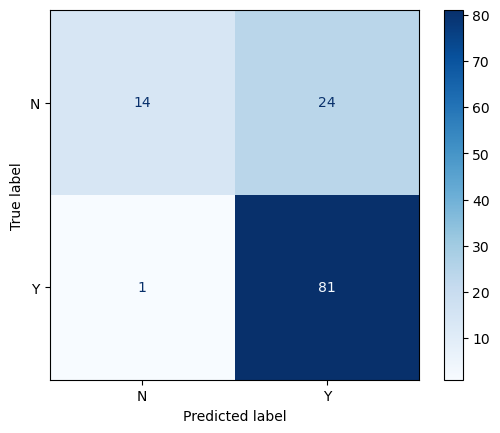

In [76]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg,x_test, y_test, cmap=plt.cm.Blues)

In [77]:
from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.93      0.37      0.53        38
           Y       0.77      0.99      0.87        82

    accuracy                           0.79       120
   macro avg       0.85      0.68      0.70       120
weighted avg       0.82      0.79      0.76       120



In [ ]:
### TEŞEKKÜRLER